# Diagnóstico Inicial da Evasão - CETEC

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y, xlabel):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    g = sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    
    g.set(xlabel = xlabel)
    
    new_title = 'Evasão'
    g._legend.set_title(new_title)
    # replace labels
    new_labels = ['Não', 'Sim']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.show()

df = pd.read_csv('/home/ramon/extrator/survival/evasao.csv')

In [2]:
def permutation_test(events, obs_diff, n1):
    n = len(events)
    n2 = n-n1
    idxs = np.arange(0, n)



    values = []
    for i in range(10000):
        foo = np.full(n, False)
        idx_a = np.random.choice(idxs, n1, replace=False)
        foo[idx_a] = True

        diff = np.abs(events[foo].mean() - events[~foo].mean())
        values.append(diff)

    return (np.mean(np.array(values) > obs_diff))

def proportion_test(df, col_name):
    idx = df['time'] == df.groupby('matricula')['time'].transform('max')
    counts = df[idx].groupby(col_name)['event'].mean().values
    obs_diff = np.abs(counts[0] - counts[1])
    n1 = df[idx][col_name].value_counts().values[0]
    events = df.loc[idx, 'event'].values
    
    return (permutation_test(events, obs_diff, n1))

from statsmodels.stats.proportion import proportions_ztest

def proportion_test2(df, col_name):
    idx = df['time'] == df.groupby('matricula')['time'].transform('max')
    count = df[idx].groupby(col_name)['event'].sum().values
    nobs = df[idx].groupby(col_name)['event'].count().values

    stat, pval = proportions_ztest(count, nobs)
    return pval

In [3]:
centro  = 'CETEC'
df = df[df.centro == centro]

In [4]:
df.groupby('time')['event'].value_counts()

time  event
1     0        2404
      1         587
2     0        2085
      1         303
3     0        1808
      1         273
4     0        1481
      1         327
Name: event, dtype: int64

# Perfil dos Estudantes na Amostra

- 50% evadiram
- 87% possuem cidade de origem diferente da cidade do campus
- 35% são do sexo feminino
- Idade média dos estudantes é 21
- Há 2991 números de matrículas

In [5]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

print(df[idx]['event'].value_counts(normalize=True))

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

print(df[idx]['sexo'].value_counts(normalize=True))

print(df[idx]['idade_ingresso'].mean())

print(df.matricula.nunique())

0    0.501839
1    0.498161
Name: event, dtype: float64
1    0.873287
0    0.126713
Name: is_outra_cidade, dtype: float64
1    0.648278
0    0.351722
Name: sexo, dtype: float64
21.036442661317285
2991


# Q1 Taxa de evasão é maior para estudantes cuja cidade de origem difere da cidade do campus?


- A diferença não é estatisticamente significativa

1    0.873287
0    0.126713
Name: is_outra_cidade, dtype: float64
   is_outra_cidade  event    percent
0                0      1  50.923483
1                0      0  49.076517
2                1      0  50.344564
3                1      1  49.655436


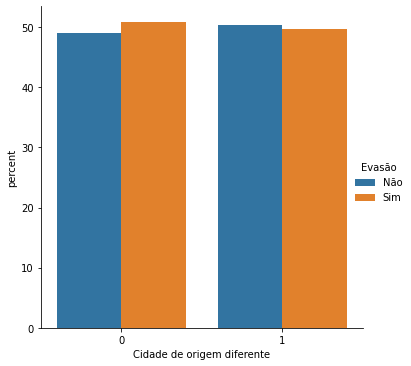

In [6]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_outra_cidade', 'event', 'Cidade de origem diferente')

In [7]:
#print('%.3f'%(proportion_test(df, 'is_outra_cidade')))
print(proportion_test2(df, 'is_outra_cidade'))

0.6445204355983982


# Q2 Taxa de evasão é maior para ingressantes no 1o semestre ou 2o semestre letivo? (Ex: taxa de evasão é maior para ingressantes em 2019.1 ou 2019.2?)

- Taxa de Evasão é maior entre ingressantes no 1o semestre (50% vs 49%)
- A diferença não é estatisticamente significativa

1    0.549649
2    0.450351
Name: semestreIngresso, dtype: float64
   semestreIngresso  event    percent
0                 1      1  50.425791
1                 1      0  49.574209
2                 2      0  50.927988
3                 2      1  49.072012


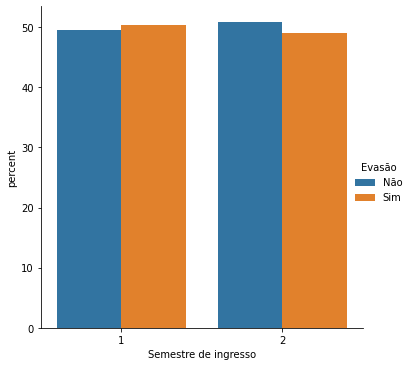

In [8]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreIngresso'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreIngresso', 'event', 'Semestre de ingresso')

In [9]:
#print('%.3f'%(proportion_test(df, 'periodoingresso')))
print(proportion_test2(df, 'semestreIngresso'))

0.4612877882180869


# Q3 A taxa de evasão é maior no 1o ou 2o semestre do ano?

- Taxa de evasão é maior no 2o semestre do ano (51% vs 47%)
- A diferença não é estatisticamente significativa

1    0.532263
2    0.467737
Name: semestreLetivo, dtype: float64
   semestreLetivo  event    percent
0               1      0  51.381910
1               1      1  48.618090
2               2      1  51.179414
3               2      0  48.820586


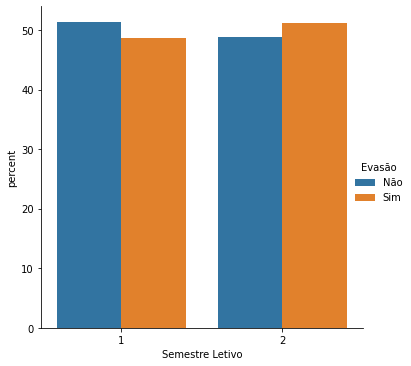

In [10]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreLetivo'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreLetivo', 'event', 'Semestre Letivo')

In [11]:
print(proportion_test2(df, 'semestreLetivo'))

0.16214945010770443


# Q4 Taxa taxa de evasão é maior para homens ou mulheres?

- A taxa de evasão é maior para homens (50% vs 49%).
- A diferença não é estatisticamente significativa.
- Taxa de evasão apresenta crescimento do 3o para 4o período

1    0.648278
0    0.351722
Name: sexo, dtype: float64
   sexo  event    percent
0     0      0  51.235741
1     0      1  48.764259
2     1      1  50.386797
3     1      0  49.613203


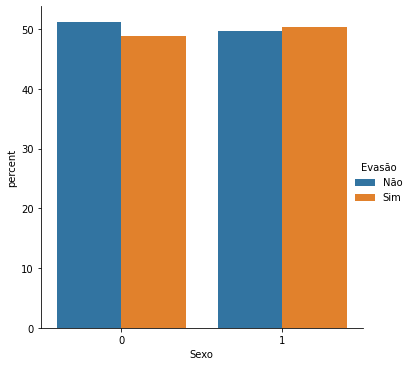

In [12]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['sexo'].value_counts(normalize=True))

plot_percentage(df[idx], 'sexo', 'event', 'Sexo')

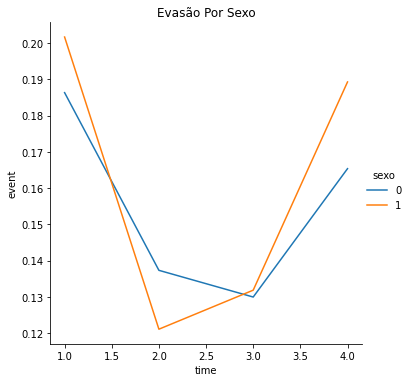

In [13]:
data = df.groupby(['time','sexo']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='sexo',  kind="line")    
ax.set(title='Evasão Por Sexo')    

In [14]:
#print('%.3f'%(proportion_test(df, 'sexo')))
print(proportion_test2(df, 'sexo'))

0.3967416296553672


# Q5 Taxa de evasão decresce com o tempo?

- A taxa de evasão tende a decrescer com o tempo, apesar de apresentar alta do 3o para 4o período

[Text(0.5, 1.0, 'Evasão Geral')]

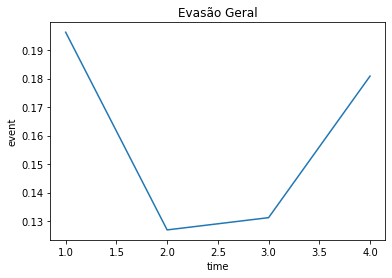

In [15]:
data = df.groupby('time').agg({'event':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='event', data=data)    
ax.set(title='Evasão Geral')

# Q6 Taxa de evasão difere entre ingressantes por cota e ampla concorrência?

- A taxa de evasão é maior para Cotista (53% vs 47%)
- A diferença observada é estatisticamente significativa

0    0.5443
1    0.4557
Name: is_cotista, dtype: float64
   is_cotista  event    percent
0           0      0  52.764128
1           0      1  47.235872
2           1      1  52.898019
3           1      0  47.101981


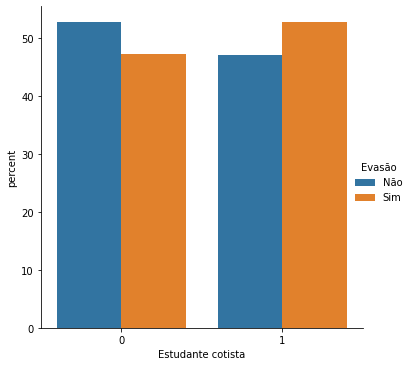

In [16]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_cotista'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_cotista', 'event', 'Estudante cotista')

In [17]:
#print('%.3f'%(proportion_test(df, 'is_cotista')))
print(proportion_test2(df, 'is_cotista'))

0.0020391307210575584


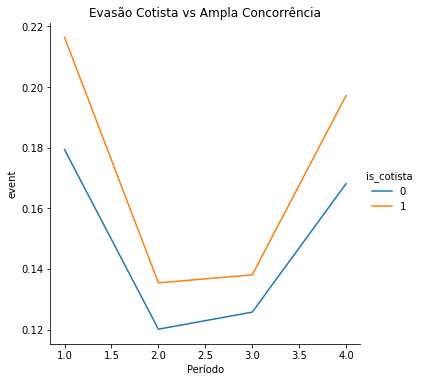

In [18]:
data = df.groupby(['time','is_cotista']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='is_cotista',  kind="line")    
ax.set(title='Evasão Cotista vs Ampla Concorrência', xlabel='Período')    

# Q.7 A idade de ingresso afeta a taxa de evasão?

- A idade de ingresso parece afetar a taxa de evasão

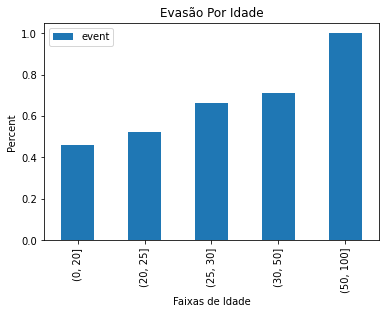

In [19]:
col = 'idade_cat'
df[col] = pd.cut(df.idade_ingresso, bins=[0,20,25,30,50,100])


ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Idade', xlabel='Faixas de Idade')
plt.show()

# Turno afeta evasão?

In [20]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

df[idx].groupby('turno').agg({'event':'mean'})

,event
turno,
Matutino e Vespertino,0.498161


# Grau afeta evasão?

In [21]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

df[idx].groupby('grau').agg({'event':'mean'})

,event
grau,
Bacharelado,0.498161


# Análise Bivariada

Idade Ingresso vs Turno


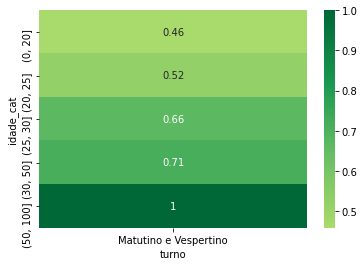

Idade Ingresso vs Grau do Curso


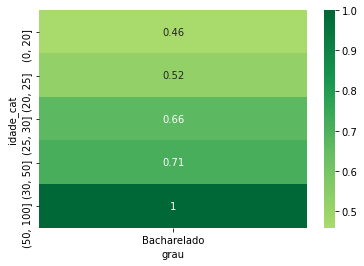

Idade Ingresso vs Sexo


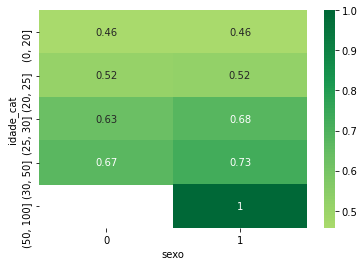

Idade Ingresso vs Cotista


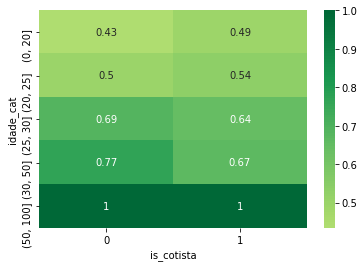

Idade Ingresso vs Migrante


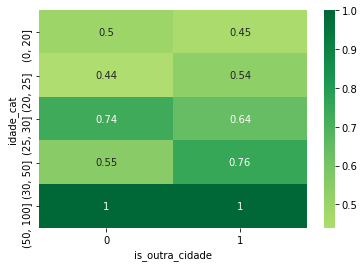

Idade Ingresso vs Período


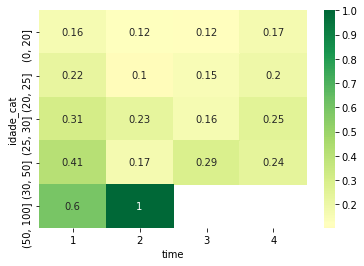

Turno vs Grau do Curso


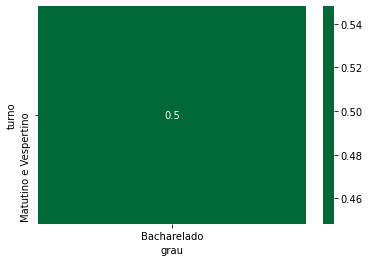

Turno vs Sexo


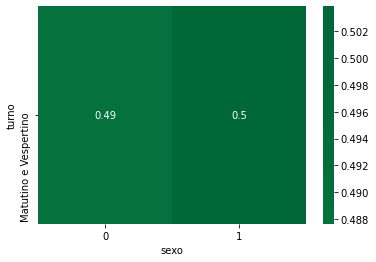

Turno vs Cotista


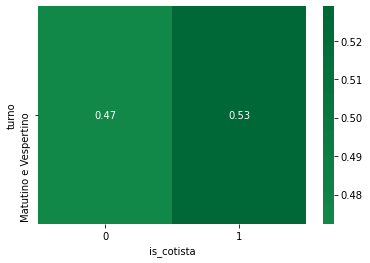

Turno vs Migrante


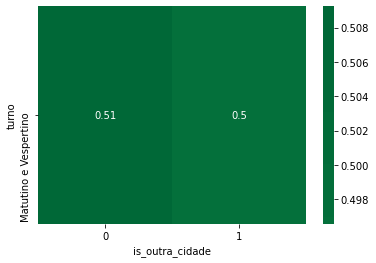

Turno vs Período


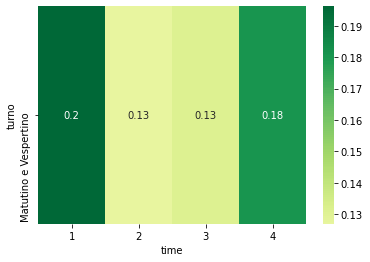

Grau do Curso vs Sexo


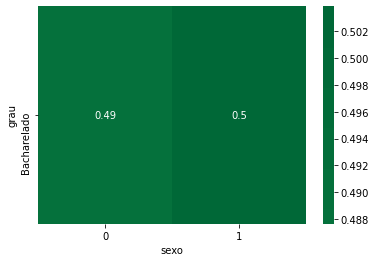

Grau do Curso vs Cotista


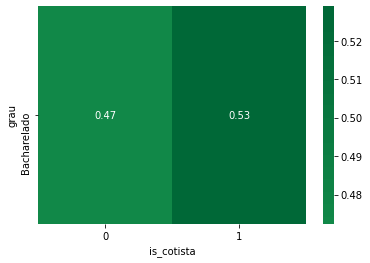

Grau do Curso vs Migrante


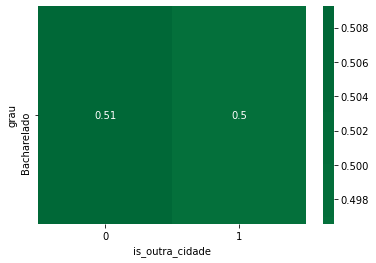

Grau do Curso vs Período


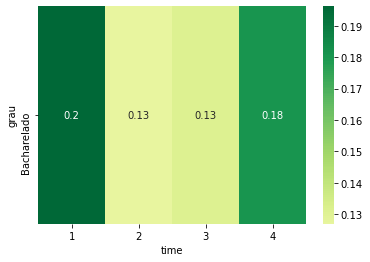

Sexo vs Cotista


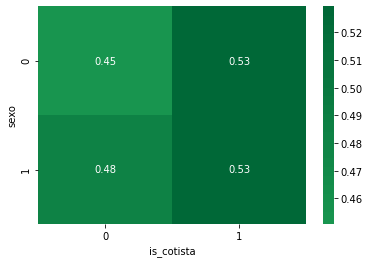

Sexo vs Migrante


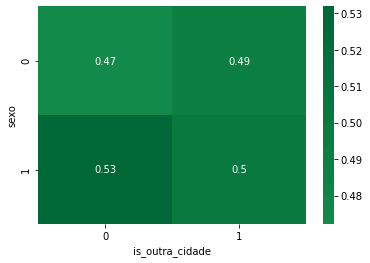

Sexo vs Período


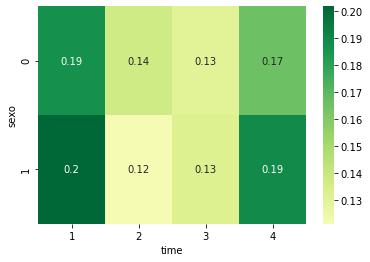

Cotista vs Migrante


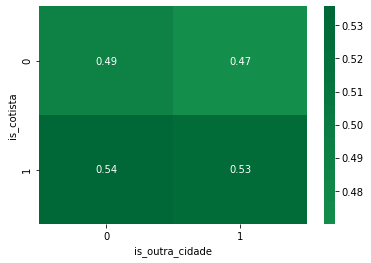

Cotista vs Período


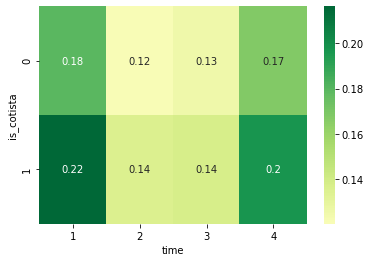

Migrante vs Período


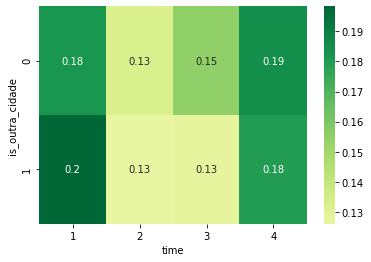

In [22]:
nomes = ['Idade Ingresso', 'Turno', 'Grau do Curso', 'Sexo', 'Cotista', 'Migrante', 'Período']
x = ['idade_cat', 'turno', 'grau', 'sexo', 'is_cotista',  'is_outra_cidade', 'time']

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


for i in range(0, len(x)):
    for j in range(i+1, len(x)):
        print('%s vs %s'%(nomes[i], nomes[j]))
        if x[j] == 'time':
            result = pd.pivot_table(data=df, index=x[i], columns=x[j], values='event')
        else:
            result = pd.pivot_table(data=df[idx], index=x[i], columns=x[j], values='event')
        sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
        plt.show()